In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f

In [12]:
temp_pd = pd.read_csv('../podatki/Temp_LJ.csv')

# Temperature, indeksirane po mesecih
temp = np.array(temp_pd)[:, -1]

0.1

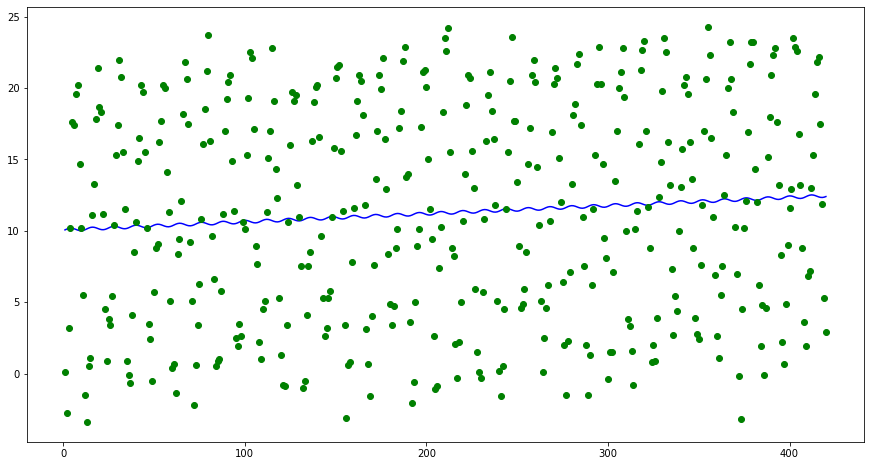

In [93]:
# Ožji model A
X = np.linspace(1, temp.shape[0], temp.shape[0]).reshape(temp.shape[0], 1)
sinus = np.sin(2 * np.pi / 12 *(np.linspace(1, temp.shape[0], temp.shape[0]) - 1)).reshape(temp.shape[0], 1)
X = np.concatenate((np.ones(X.shape), X, sinus), axis=-1)

# Cenilka za Y pri modelu A
min_kvadrati = np.linalg.lstsq(X, temp, rcond=None)
beta_a = min_kvadrati[0]
rss_a = min_kvadrati[1][0]
dim_a = min_kvadrati[2]

# Graf cenilke modela A po mesečnih temperaturah
fig, ax = plt.subplots(figsize=(15, 8))
cas = np.linspace(1, temp.shape[0], temp.shape[0])
ax.plot(cas, np.matmul(X, beta_a), color='blue')
ax.plot(cas, temp, 'go')
fig.savefig('../rezultati/temperature_model_A.jpg', dpi=150)


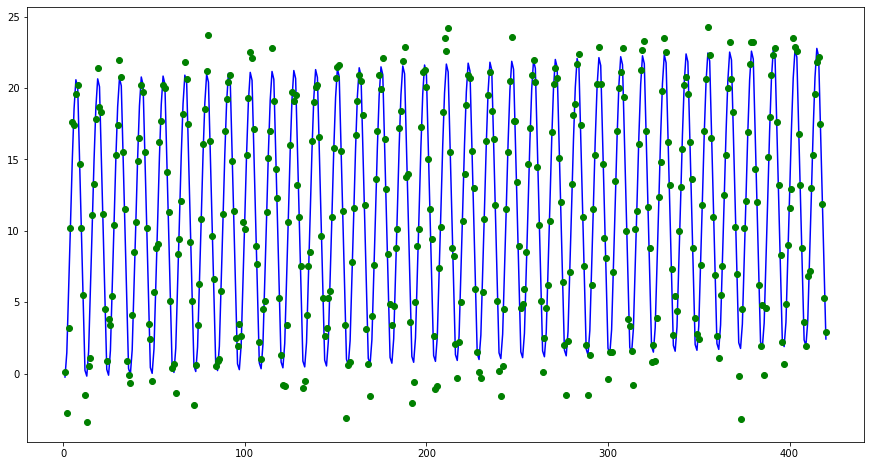

In [88]:
# Širši model B
X = np.linspace(1, temp.shape[0], temp.shape[0]).reshape(temp.shape[0], 1)
B = np.array([np.identity(12) for i in range(int(temp.shape[0] / 12))])
B = B.reshape((temp.shape[0], 12))
X = np.concatenate((X, B), axis=-1)

# Cenilka za Y pri modelu B
min_kvadrati = np.linalg.lstsq(X, temp, rcond=None)
beta_b = min_kvadrati[0]
rss_b = min_kvadrati[1][0]
dim_b = min_kvadrati[2]

# Graf cenilke modela A po mesečnih temperaturah
fig, ax = plt.subplots(figsize=(15, 8))
cas = np.linspace(1, temp.shape[0], temp.shape[0])
ax.plot(cas, np.matmul(X, beta_b), color='blue')
ax.plot(cas, temp, 'go')
fig.savefig('../rezultati/temperature_model_B.jpg', dpi=150)


In [68]:
# Fisherjeva statistika in F-test
F = ((rss_a - rss_b) / (dim_b - dim_a)) / (rss_b / (temp.shape[0] - dim_b))
alpha_1 = 0.01
alpha_2 = 0.05

dfn = dim_b - dim_a
dfd = temp.shape[0] - dim_b
ovrzemo_1 = F >= f.ppf(1 - alpha_1, dfn, dfd)
ovrzemo_2 = F >= f.ppf(1 - alpha_2, dfn, dfd)
if ovrzemo_1:
    print('Pri stopnji tveganja ', alpha_1, ' ničto hipotezo zavrnemo.')
else:
    print('Pri stopnji tveganja ', alpha_1, ' ničte hipoteze ne zavrnemo.')

if ovrzemo_2:
    print('Pri stopnji tveganja ', alpha_2, ' ničto hipotezo zavrnemo.')
else:
    print('Pri stopnji tveganja ', alpha_2, ' ničte hipoteze ne zavrnemo.')

Pri stopnji tveganja  0.01  ničto hipotezo zavrnemo.
Pri stopnji tveganja  0.05  ničto hipotezo zavrnemo.


In [73]:
# Akaikejeva informacija
st_param_a = beta_a.shape[0] + 1
st_param_b = beta_b.shape[0] + 1
st_opazanj = temp.shape[0]

AIC_a = 2 * st_param_a + st_opazanj * np.log(rss_a)
AIC_b = 2 * st_param_b + st_opazanj * np.log(rss_b)
AIC_b < AIC_a

True